# **Lab 4: Python Review Double Slit Experiment Simulator**
---

### **Description**
In today's lab, you will review variables, functions, and objects. Then, you will use these skills to explore a simulator of the double slit experiment.

<br>

### **Lab Structure**
**Part 1**: [Review](#p1)

**Part 2**: [Using the Double Slit Experiment Simulator](#p2)

**Part 3**: [Modifying the Double Slit Experiment Simulator](#p3)

**Part 4**: [Additional Practice Problems](#p4)

<br>

### **Learning Objectives**
By the end of this lab, we will:
* Recognize how different components of the double slit experiment affect the interference pattern.
* Understand how to modify attributes of the `doubleSlit` object to recreate interference patterns.


<br>

### **Resources**
* [Double Slit Simulator Documentation](https://drive.google.com/file/d/1iP6t6RAFF-14IAzj8rwuLU_OzqjA7vMs/view?usp=drive_link)

<br>

**Before starting, run the code below to import all necessary functions and libraries.**


In [ ]:
# @title
import matplotlib.pyplot as plt
import numpy as np
import scipy

class waveFunction():
  def __init__(self,d, distance_to_screen,measure_slit):
    self.d = d
    self.distance_to_screen = distance_to_screen
    self.measure_slit= measure_slit
    if not self.measure_slit:
      self.values = np.linspace(-10,10,num=1000)
      self.norm = scipy.integrate.trapezoid(self.evaluate_unnormalized(self.values),self.values)
      self.probs = [0]
      self.probs.extend([scipy.integrate.trapezoid(self.evaluate(np.linspace(self.values[i],self.values[i+1],num=100)),np.linspace(self.values[i],self.values[i+1],num=100)) for i in range(999)])
      self.probs = self.probs/sum(self.probs)
    else:
      self.values = [-1*self.d/2,self.d/2]
      self.norm = 1
      self.probs = [0.5,0.5]
  def evaluate(self,x):
    if not self.measure_slit:
      return np.cos(np.pi * self.d* x/self.distance_to_screen)**2/self.norm
    else:
      if float(x)== float(-1*self.d/2):
        return 0.5
      elif float(x)== float(self.d/2):
        return 0.5
      else:
        return 0
  def measure(self):
    temp_value = np.random.choice(self.values, p=self.probs)
    if self.measure_slit:
      temp_value += np.random.normal(scale = 0.2)
    else:
      temp_value += np.random.uniform(low=-0.01,high=0.01)
    return temp_value
  def evaluate_unnormalized(self,x):
    return np.cos(np.pi * self.d * x/self.distance_to_screen)**2

class doubleSlit():
  def __init__(self,slit_dist = 1, distance_to_screen = 10, screen_width = 200, screen_height=100, measure_slit = False):
    self.slit_dist = slit_dist
    self.distance_to_screen = distance_to_screen
    self.detections_x = []
    self.detections_y = []
    self.screen_width = screen_width
    self.screen_height = screen_height
    self.measure_slit = measure_slit
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def fire_electron(self):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    detected_x = self.distance_to_screen*np.tan(self.wavefunction.measure())
    self.detections_x.append(self.wavefunction.measure())
    self.detections_y.append(np.random.normal(scale=1.7))
  def show_screen(self):
    plt.hist2d(self.detections_x,self.detections_y,[self.screen_width,self.screen_height],range=[[-10,10],[-5,5]])
    plt.minorticks_on()
    plt.show()
  def show_hist(self):
    plt.hist(self.detections_x,bins=self.screen_width)
    plt.xlabel("Distance from center")
    plt.ylabel("Number of Electrons Detected")
    plt.minorticks_on()
    plt.show()
  def clear_screen(self):
    self.detections_x = []
    self.detections_y = []
    self.wavefunction = waveFunction(self.slit_dist, self.distance_to_screen,self.measure_slit)
  def electron_beam(self, num_electrons = 5000):
    if self.slit_dist != self.wavefunction.d:
      raise ValueError("slit_dist attribute has been modified. Screen must be cleared.")
    elif self.distance_to_screen != self.wavefunction.distance_to_screen:
      raise ValueError("distance_to_screen attribute has been modified. Screen must be cleared.")
    for i in range(num_electrons):
      self.fire_electron()
print("Libraries imported successfully!")

Libraries imported successfully!


<a name="p2"></a>

---
## **Part 2: Using the Double Slit Experiment Simulator**
---
In this part, you will learn how to use the double slit experiment simulator.

#### **Problem #2.1**
**Together**, create a `doubleSlit` object using its associated function. All of its arguments are optional, so you do not need to put anything in the parentheses yet.


In [ ]:
my_experiment = doubleSlit() # COMPLETE THIS CODE

#### **Problem #2.2**
**Together,** use the appropriate method of the `doubleSlit` object to display the screen.

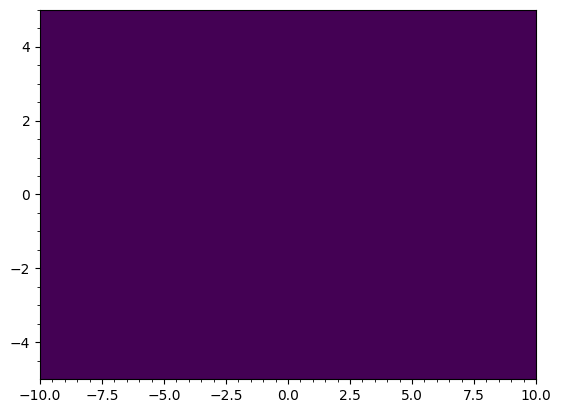

In [ ]:
# COMPLETE THIS CODE
my_experiment.show_screen()

#### **Problem #2.3**
**Together,** use the appropriate method of the `doubleSlit` object to fire a single electron at the screen. Then, display the screen again.

In [ ]:
# COMPLETE THIS CODE
my_experiment.fire_electron()

#### **Problem #2.4**

**Together**, create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire an electron and display the screen.

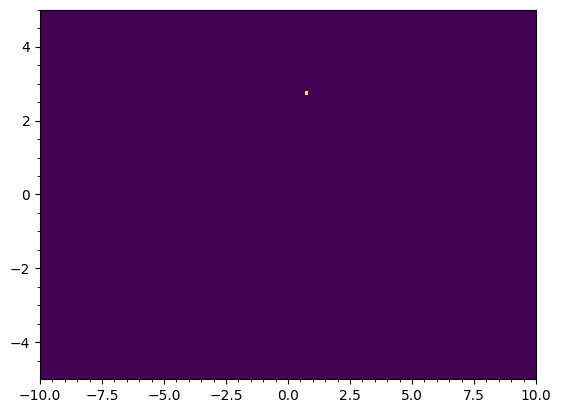

In [ ]:
# COMPLETE THIS CODE
another_obj = doubleSlit(measure_slit=True)
another_obj.measure_slit
another_obj.fire_electron()
another_obj.show_screen()

####**Problem #2.5**
**Together,** use the appropriate method to fire 500 electrons at the screen. Then, display the screen.

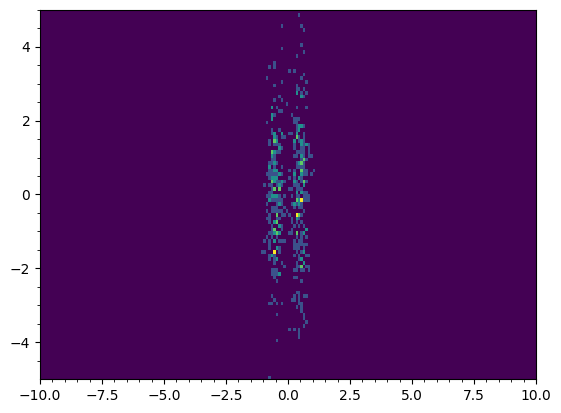

In [ ]:
# COMPLETE THIS CODE
another_obj.electron_beam(num_electrons=500)
another_obj.show_screen()

#### **Problem #2.6**
**Independently,** use the appropriate method to fire 10,000 electrons at the screen. Then, display the screen.

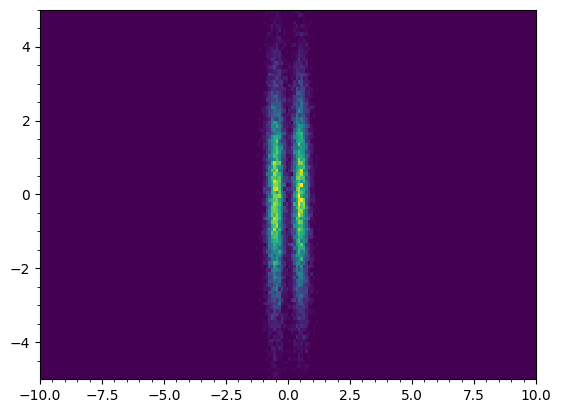

In [ ]:
# COMPLETE THIS CODE
another_obj.electron_beam(num_electrons = 10000)
another_obj.show_screen()

#### **Problem #2.7**
**Independently,** create a  `doubleSlit` object so that you measure which slit the electron passes through. Then, fire 10000 electrons and display the screen.

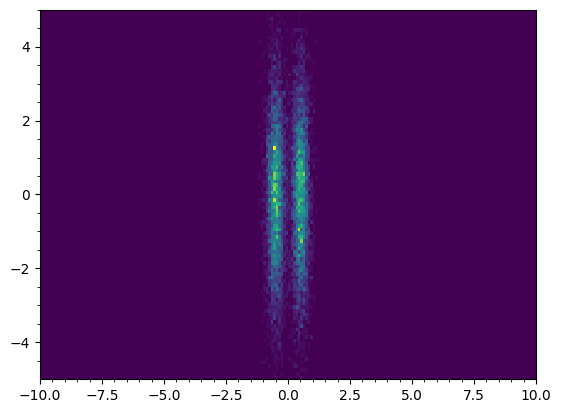

In [ ]:
# COMPLETE THIS CODE
pizza = doubleSlit(measure_slit=True)
pizza.electron_beam(10000)
pizza.show_screen()

---

<center>

### **Wait for Your Instructor to Continue**

---

<a name="p3"></a>

---
## **Part 3: Modifying the Double Slit Experiment Simulator**
---
In this part, you will see how certain modifications to the `doubleSlit` object affect the interference pattern shown on the screen.

#### **Problem #3.1**
**Together,** debug the code below.

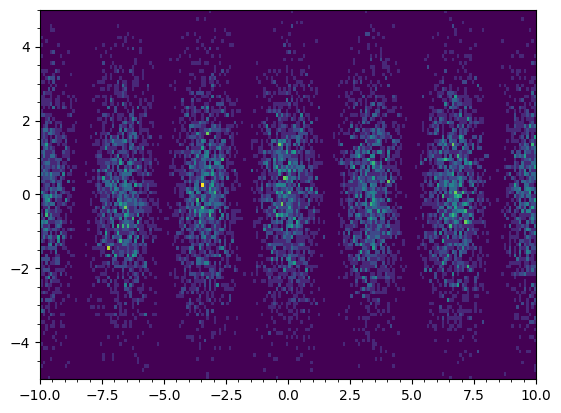

In [ ]:
my_experiment = doubleSlit()
my_experiment.slit_dist=3
my_experiment.clear_screen()
my_experiment.electron_beam(num_electrons=10000)
my_experiment.show_screen()

#### **Problem #3.2**
**Together,** create a `doubleSlit` object that starts with a slit distance of 3.

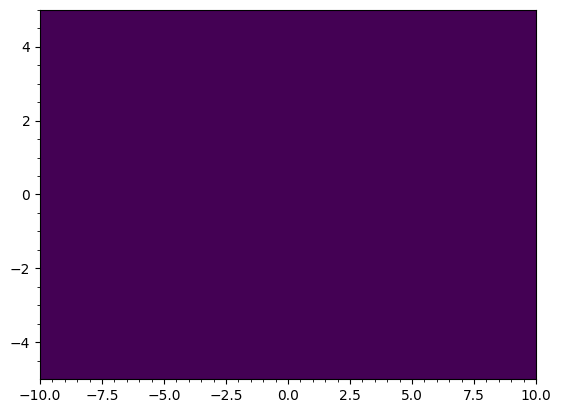

In [ ]:
# COMPLETE THIS CODE
my_experiment = doubleSlit(slit_dist=3)

####**Problem #3.3**

**Independently**, create a `doubleSlit` object with a slit distance of 6, and fire an electron beam of 10,000 electrons. How do you expect this to compare to the slit distance of 3?

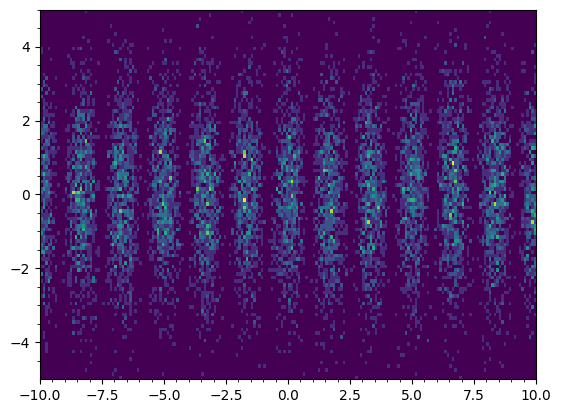

In [ ]:
# COMPLETE THIS CODE
my_experiment = doubleSlit(slit_dist=6)
my_experiment.electron_beam(10000)
my_experiment.show_screen()

####**Problem #3.4**

**Independently**, create a `doubleSlit` object with a slit distance of 50, and fire an electron beam of 10,000 electrons.

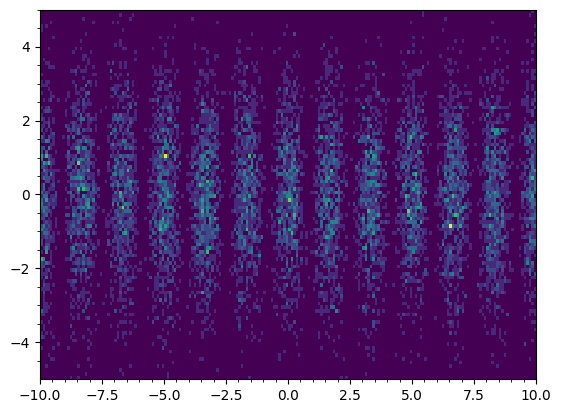

In [ ]:
# COMPLETE THIS CODE
my_experiment = doubleSlit(slit_dist=6)
my_experiment.electron_beam(10000)
my_experiment.show_screen()

#End of notebook
---
© 2023 The Coding School, All rights reserved